In [1]:
import torch

# Example data (inputs and targets)
X, Y = torch.randn((100, 10), requires_grad=False), torch.randn(100, requires_grad=False)

(0.8013381361961365, 0.1327773928642273)

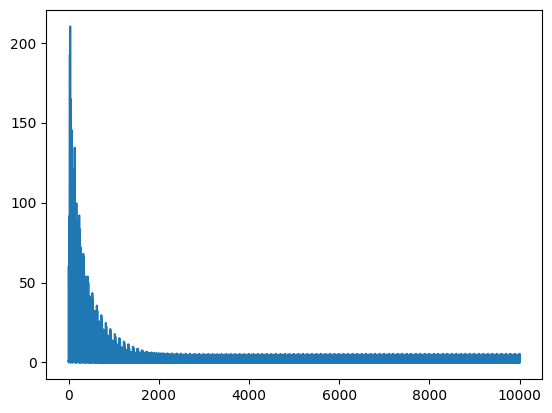

In [2]:
# Model parameters
W1 = torch.randn(2, 10, requires_grad=True)
W2 = torch.randn(2, requires_grad=True)
learning_rate = 0.0001
optimizer = torch.optim.SGD([W1, W2], lr=learning_rate)

loss_all = []


for _ in range(100):
    for i in range(Y.shape[0]):
        y_pred1 = torch.matmul(W1, X[i])
        y_pred2 = torch.matmul(W2, y_pred1)

        loss = (y_pred2 - Y[i]).pow(2).sum()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        loss_all.append(loss.detach().cpu().item())

import matplotlib.pyplot as plt

plt.plot(loss_all)
loss_all[0], loss_all[-1]

(211.86485290527344, 0.03300409018993378)

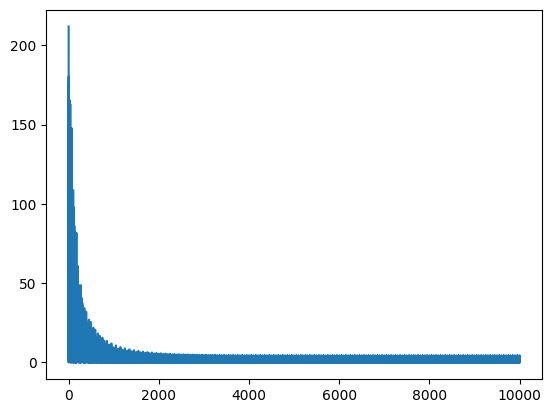

In [3]:
# Model parameters
W1 = torch.randn(2, 10, requires_grad=True)
W2 = torch.randn(2, requires_grad=True)
learning_rate = 0.0001
optimizer = torch.optim.SGD([W1, W2], lr=learning_rate)

loss_all = []

for _ in range(100):
    y_pred1_all = []
    for i in range(Y.shape[0]):
        y_pred1 = torch.matmul(W1, X[i])
        y_pred1_all.append(y_pred1)

    for idx, y_pred1 in enumerate(y_pred1_all):
        y_pred2 = torch.matmul(W2, y_pred1)

        loss = (y_pred2 - Y[idx]).pow(2).sum()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        loss_all.append(loss.detach().cpu().item())

import matplotlib.pyplot as plt

plt.plot(loss_all)
loss_all[0], loss_all[-1]

In [10]:
import torch

# Example data (inputs and targets)
x1, y1 = torch.randn(10, requires_grad=False), torch.randn(1, requires_grad=False)
x2, y2 = torch.randn(10, requires_grad=False), torch.randn(1, requires_grad=False)

# Model parameters
W = torch.randn(1, 10, requires_grad=True)
learning_rate = 0.001
optimizer = torch.optim.SGD([W], lr=learning_rate)
# print(W)

for _ in range(100):
    y_pred1 = torch.matmul(W, x1)
    y_pred2 = torch.matmul(W, x2)

    loss = (y_pred1 - y1).pow(2).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # print(W)

    loss = (y_pred2 - y2).pow(2).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # print(W)
    print(loss)


tensor(14.4087, grad_fn=<SumBackward0>)
tensor(13.8511, grad_fn=<SumBackward0>)
tensor(13.3176, grad_fn=<SumBackward0>)
tensor(12.8070, grad_fn=<SumBackward0>)
tensor(12.3184, grad_fn=<SumBackward0>)
tensor(11.8506, grad_fn=<SumBackward0>)
tensor(11.4028, grad_fn=<SumBackward0>)
tensor(10.9739, grad_fn=<SumBackward0>)
tensor(10.5632, grad_fn=<SumBackward0>)
tensor(10.1698, grad_fn=<SumBackward0>)
tensor(9.7930, grad_fn=<SumBackward0>)
tensor(9.4318, grad_fn=<SumBackward0>)
tensor(9.0858, grad_fn=<SumBackward0>)
tensor(8.7540, grad_fn=<SumBackward0>)
tensor(8.4360, grad_fn=<SumBackward0>)
tensor(8.1311, grad_fn=<SumBackward0>)
tensor(7.8387, grad_fn=<SumBackward0>)
tensor(7.5583, grad_fn=<SumBackward0>)
tensor(7.2892, grad_fn=<SumBackward0>)
tensor(7.0311, grad_fn=<SumBackward0>)
tensor(6.7834, grad_fn=<SumBackward0>)
tensor(6.5457, grad_fn=<SumBackward0>)
tensor(6.3174, grad_fn=<SumBackward0>)
tensor(6.0983, grad_fn=<SumBackward0>)
tensor(5.8879, grad_fn=<SumBackward0>)
tensor(5.6858, 

In [11]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, global_mean_pool

# Step 2: Define the GNN Model


class GCN(torch.nn.Module):
    def __init__(self,num_node_features: int):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, 16)
        self.conv2 = GCNConv(16, 16)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)

        return x


# Step 1: Generate a Synthetic Graph
# Node features
x = torch.tensor([[1, 0], [0, 1], [1, 1], [1, 0]], dtype=torch.float)
# Edges
edge_index = torch.tensor([[0, 1, 2, 3, 0, 2],
                           [1, 0, 3, 2, 2, 0]], dtype=torch.long)
# Edge labels for classification
edge_label = torch.tensor([0, 1, 0, 1, 1, 0], dtype=torch.long)

data = Data(x=x, edge_index=edge_index)

model = GCN(num_node_features=data.num_node_features)

# Edge classifier: A simple linear layer
# Assuming we concatenate two node embeddings
edge_classifier = torch.nn.Linear(16 * 2, 2)

optimizer = torch.optim.Adam(
    list(model.parameters()) + list(edge_classifier.parameters()), lr=0.01)

# Step 3: Training Loop
for epoch in range(100):
    node_embeddings = model(data)

    # node_embeddings.shape == torch.Size([4, 16])

    # Get embeddings of both source and target nodes of each edge
    source_embeddings = node_embeddings[data.edge_index[0]]
    target_embeddings = node_embeddings[data.edge_index[1]]

    # Edge classification: Here we concatenate source and target embeddings
    edge_embeddings = torch.cat([source_embeddings, target_embeddings], dim=1)
    edge_pred = edge_classifier(edge_embeddings)

    loss = F.cross_entropy(edge_pred, edge_label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    _, pred = torch.max(edge_pred, dim=1)
    correct = pred.eq(edge_label).sum().item()
    accuracy = correct / edge_label.size(0)

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}, Accuracy: {accuracy}')

Epoch 0, Loss: 0.7036692500114441, Accuracy: 0.5
Epoch 10, Loss: 0.5831810235977173, Accuracy: 1.0
Epoch 20, Loss: 0.30456265807151794, Accuracy: 1.0
Epoch 30, Loss: 0.06172625347971916, Accuracy: 1.0
Epoch 40, Loss: 0.010245329700410366, Accuracy: 1.0
Epoch 50, Loss: 0.0031588503625243902, Accuracy: 1.0
Epoch 60, Loss: 0.0016466225497424603, Accuracy: 1.0
Epoch 70, Loss: 0.0011508435709401965, Accuracy: 1.0
Epoch 80, Loss: 0.0009261702070944011, Accuracy: 1.0
Epoch 90, Loss: 0.0007948923739604652, Accuracy: 1.0


In [12]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

# Synthetic Graph Data Setup (including node features, edges, and edge labels)
x = torch.tensor([[1, 0], [0, 1], [1, 1], [1, 0]],
                 dtype=torch.float)  # Node features
edge_index = torch.tensor(
    [[0, 1, 2, 3, 0, 2], [1, 0, 3, 2, 2, 0]], dtype=torch.long
)  # Edges
edge_label = torch.tensor(
    [0, 1, 0, 1, 1, 0], dtype=torch.long
)  # Edge labels for classification

data = Data(x=x, edge_index=edge_index)


# EnhancedGCN Model Definition with Learnable Embeddings
class EnhancedGCN(torch.nn.Module):
    def __init__(self, num_nodes, num_node_features, num_embedding_features):
        super(EnhancedGCN, self).__init__()
        self.embeddings = torch.nn.Embedding(num_nodes, num_embedding_features)
        self.embeddings.weight.data.uniform_(0, 1)  # Initialize embeddings

        self.conv1 = GCNConv(num_embedding_features, 16)
        self.conv2 = GCNConv(16, 16)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        node_indices = torch.arange(
            0, x.size(0), dtype=torch.long, device=x.device)
        node_embeddings = self.embeddings(node_indices)

        # x = torch.cat([x, node_embeddings], dim=1)  # Concatenate original features with embeddings
        # x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv1(node_embeddings, edge_index))

        x = self.conv2(x, edge_index)

        return x


# Model and Optimizer Setup
num_nodes = data.num_nodes
num_node_features = data.num_features
num_embedding_features = 5  # Example additional embedding size
model = EnhancedGCN(num_nodes, num_node_features, num_embedding_features)

edge_classifier = torch.nn.Linear(
    16 * 2, 2
)  # Classifier for the concatenated node embeddings
optimizer = torch.optim.Adam(
    list(model.parameters()) + list(edge_classifier.parameters()), lr=0.01
)

# Training Loop with Accuracy Calculation for Edge Classification
for epoch in range(100):
    optimizer.zero_grad()
    node_embeddings = model(data)

    source_embeddings = node_embeddings[data.edge_index[0]]
    target_embeddings = node_embeddings[data.edge_index[1]]
    edge_embeddings = torch.cat([source_embeddings, target_embeddings], dim=1)

    edge_pred = edge_classifier(edge_embeddings)
    loss = F.cross_entropy(edge_pred, edge_label)
    loss.backward()
    optimizer.step()

    # Calculate and print accuracy
    _, pred = torch.max(edge_pred, dim=1)
    correct = pred.eq(edge_label).sum().item()
    accuracy = correct / edge_label.size(0)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}, Accuracy: {accuracy}")

Epoch 0, Loss: 0.7016706466674805, Accuracy: 0.5
Epoch 10, Loss: 0.6170232892036438, Accuracy: 1.0
Epoch 20, Loss: 0.29440099000930786, Accuracy: 1.0
Epoch 30, Loss: 0.026349933817982674, Accuracy: 1.0
Epoch 40, Loss: 0.001107526128180325, Accuracy: 1.0
Epoch 50, Loss: 0.0002521238347981125, Accuracy: 1.0
Epoch 60, Loss: 0.00012298766523599625, Accuracy: 1.0
Epoch 70, Loss: 8.266428631031886e-05, Accuracy: 1.0
Epoch 80, Loss: 6.51434893370606e-05, Accuracy: 1.0
Epoch 90, Loss: 5.570740904659033e-05, Accuracy: 1.0


In [13]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data


class EnhancedGCNWithEdgeClassification(torch.nn.Module):
    def __init__(self, num_nodes, num_node_features, num_embedding_features, out_channels):
        super(EnhancedGCNWithEdgeClassification, self).__init__()
        self.embeddings = torch.nn.Embedding(num_nodes, num_embedding_features)
        self.embeddings.weight.data.uniform_(0, 1)  # Initialize embeddings

        self.conv1 = GCNConv(num_node_features + num_embedding_features, 16)
        self.conv2 = GCNConv(16, out_channels)

        # Instead of a separate edge classifier, incorporate it into the GNN model
        # Assuming binary classification for edges
        self.edge_classifier = torch.nn.Linear(out_channels * 2, 2)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        node_indices = torch.arange(
            0, x.size(0), dtype=torch.long, device=x.device)
        node_embeddings = self.embeddings(node_indices)
        # Concatenate original features with embeddings
        x = torch.cat([x, node_embeddings], dim=1)

        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)

        # Now, for each edge, use the node embeddings to predict edge labels
        source_embeddings = x[edge_index[0]]
        target_embeddings = x[edge_index[1]]
        edge_embeddings = torch.cat(
            [source_embeddings, target_embeddings], dim=1)
        edge_pred = self.edge_classifier(edge_embeddings)

        return edge_pred


# Parameters and Data Initialization
num_nodes = data.num_nodes
num_node_features = data.num_features
num_embedding_features = 5  # Example additional embedding size
out_channels = 16  # Example size for the node embeddings used in edge predictions

model = EnhancedGCNWithEdgeClassification(
    num_nodes, num_node_features, num_embedding_features, out_channels)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Assume edge_index, x, and edge_label are defined as in the previous examples

data = Data(x=x, edge_index=edge_index)

# Training Loop with the Adjusted Model
for epoch in range(100):
    optimizer.zero_grad()
    edge_pred = model(data)  # The model now directly outputs edge predictions
    loss = F.cross_entropy(edge_pred, edge_label)
    loss.backward()
    optimizer.step()

    # Calculate and print accuracy
    _, pred = torch.max(edge_pred, dim=1)
    correct = pred.eq(edge_label).sum().item()
    accuracy = correct / edge_label.size(0)

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}, Accuracy: {accuracy}')

Epoch 0, Loss: 0.6930403113365173, Accuracy: 0.5
Epoch 10, Loss: 0.46954795718193054, Accuracy: 1.0
Epoch 20, Loss: 0.06991653889417648, Accuracy: 1.0
Epoch 30, Loss: 0.002392751397565007, Accuracy: 1.0
Epoch 40, Loss: 0.0002283260109834373, Accuracy: 1.0
Epoch 50, Loss: 7.922981603769585e-05, Accuracy: 1.0
Epoch 60, Loss: 5.066202356829308e-05, Accuracy: 1.0
Epoch 70, Loss: 4.148353400523774e-05, Accuracy: 1.0
Epoch 80, Loss: 3.756973455892876e-05, Accuracy: 1.0
Epoch 90, Loss: 3.5384353395784274e-05, Accuracy: 1.0
